In [1]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az

### Part 1

C:\Users\shahr\AppData\Local\Temp\ipykernel_15104\2935603339.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')
C:\Users\shahr\AppData\Local\Temp\ipykernel_15104\2935603339.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


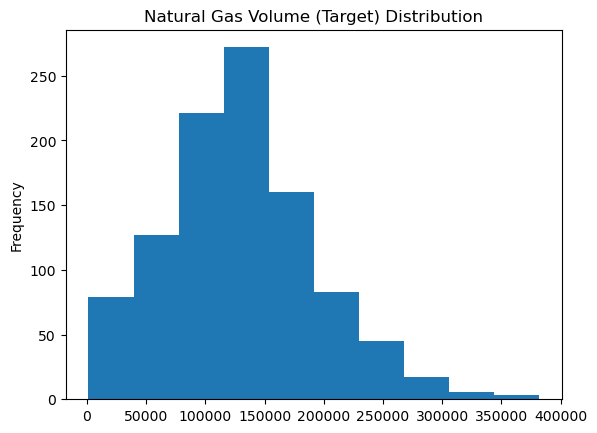

In [2]:
# Load US Stock Market Dataset 
df = pd.read_csv("US Stock Market Dataset.csv")
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

# We regress oil and metal volumes on natural gas volume
X = df[[ 'Crude_oil_Vol.', 'Copper_Vol.', 'Platinum_Vol.', 'Gold_Vol.', 'Silver_Vol.']].values
y = df['Natural_Gas_Vol.'].values

df['Natural_Gas_Vol.'].plot(kind='hist', title='Natural Gas Volume (Target) Distribution')

np.random.seed(123)

#### The target variable above shows that it is mostly normally distributed, with fat tails on the left.

In [3]:
n, p = len(y), X.shape[1]

with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.InverseGamma('sigma', alpha=1, beta=1) # inverse gamma
    y = pm.Normal('y', mu=pm.math.dot(X, betas), sigma=sigma, observed=y.reshape(-1, 1))


with MLR:
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.


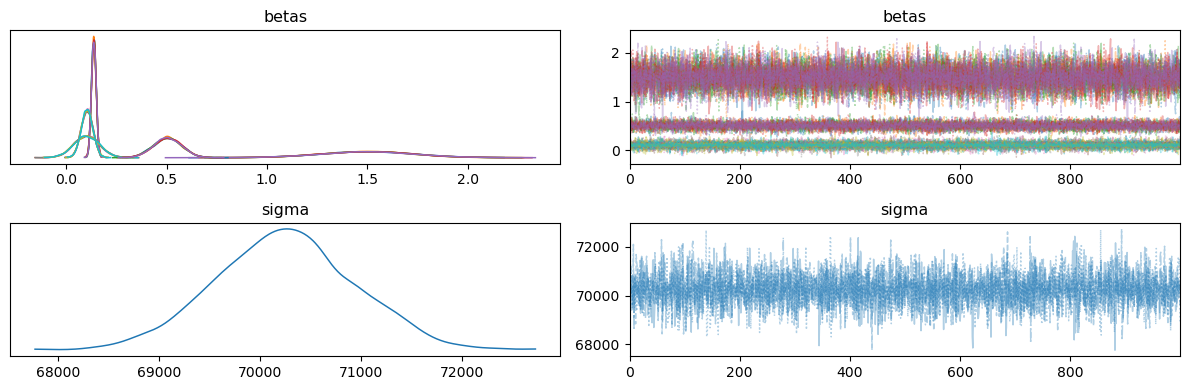

In [4]:
az.plot_trace(idata, combined=True);
plt.tight_layout()

In [5]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",0.14,0.01,0.12,0.16,0.00,0.00,4656.41,3060.32,1.0
"betas[0, 1]",0.14,0.01,0.12,0.16,0.00,0.00,4489.08,3041.98,1.0
"betas[0, 2]",0.14,0.01,0.12,0.16,0.00,0.00,4169.23,2760.25,1.0
"betas[0, 3]",0.14,0.01,0.12,0.16,0.00,0.00,4770.87,3211.00,1.0
"betas[0, 4]",0.14,0.01,0.12,0.16,0.00,0.00,4045.43,2944.63,1.0
"betas[1, 0]",0.10,0.06,-0.01,0.23,0.00,0.00,3966.44,3161.90,1.0
"betas[1, 1]",0.10,0.06,-0.02,0.22,0.00,0.00,4024.47,2997.85,1.0
"betas[1, 2]",0.10,0.06,-0.01,0.23,0.00,0.00,3740.76,3462.62,1.0
"betas[1, 3]",0.10,0.06,-0.01,0.22,0.00,0.00,4409.49,3177.84,1.0
"betas[1, 4]",0.10,0.06,-0.02,0.22,0.00,0.00,4302.38,3062.45,1.0


#### Betas have a variety of values, but are generally small in magnitude. The sigma distribution is very high being centered at 70000. This could be fixed by removing outliers and standardizing the data - the data is very noisy due to it being stock market data. The r-hat values are all less than 1.05 which suggests that there is convergence. 

### Part 2

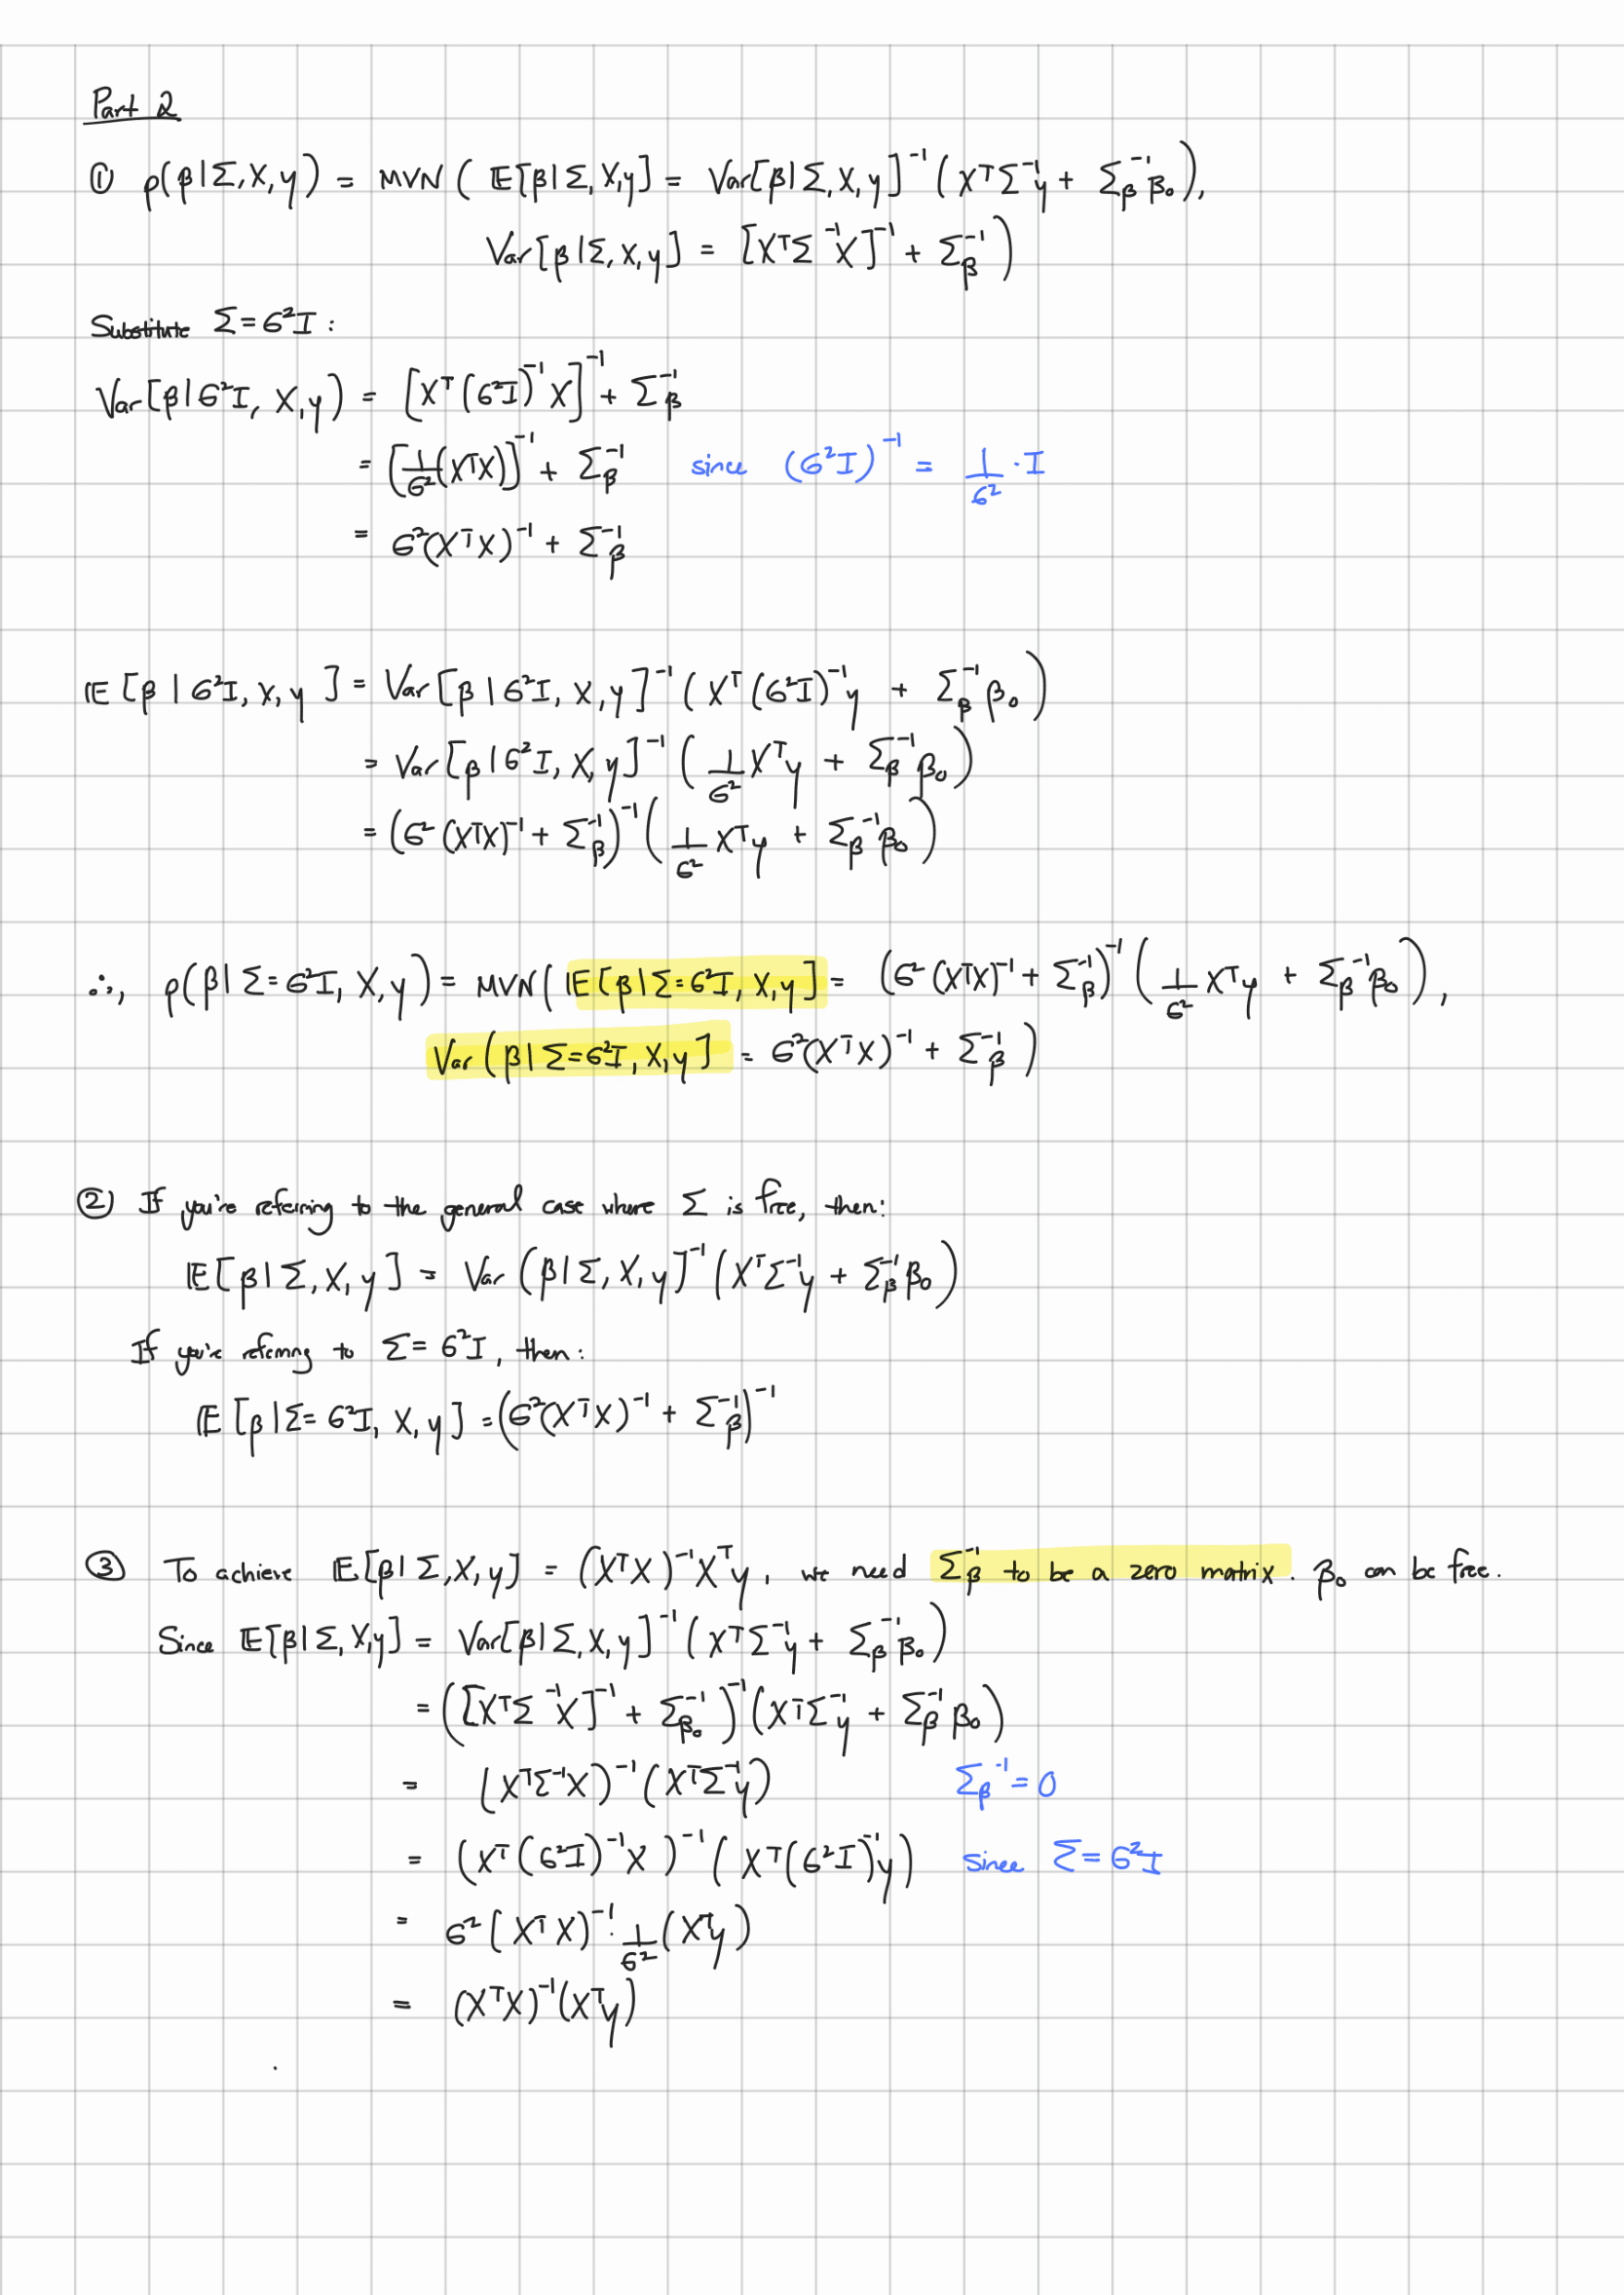

In [6]:
from IPython.display import Image

# Embed PDF in a Jupyter Notebook cell
Image("p1.png", width=800, height=500)

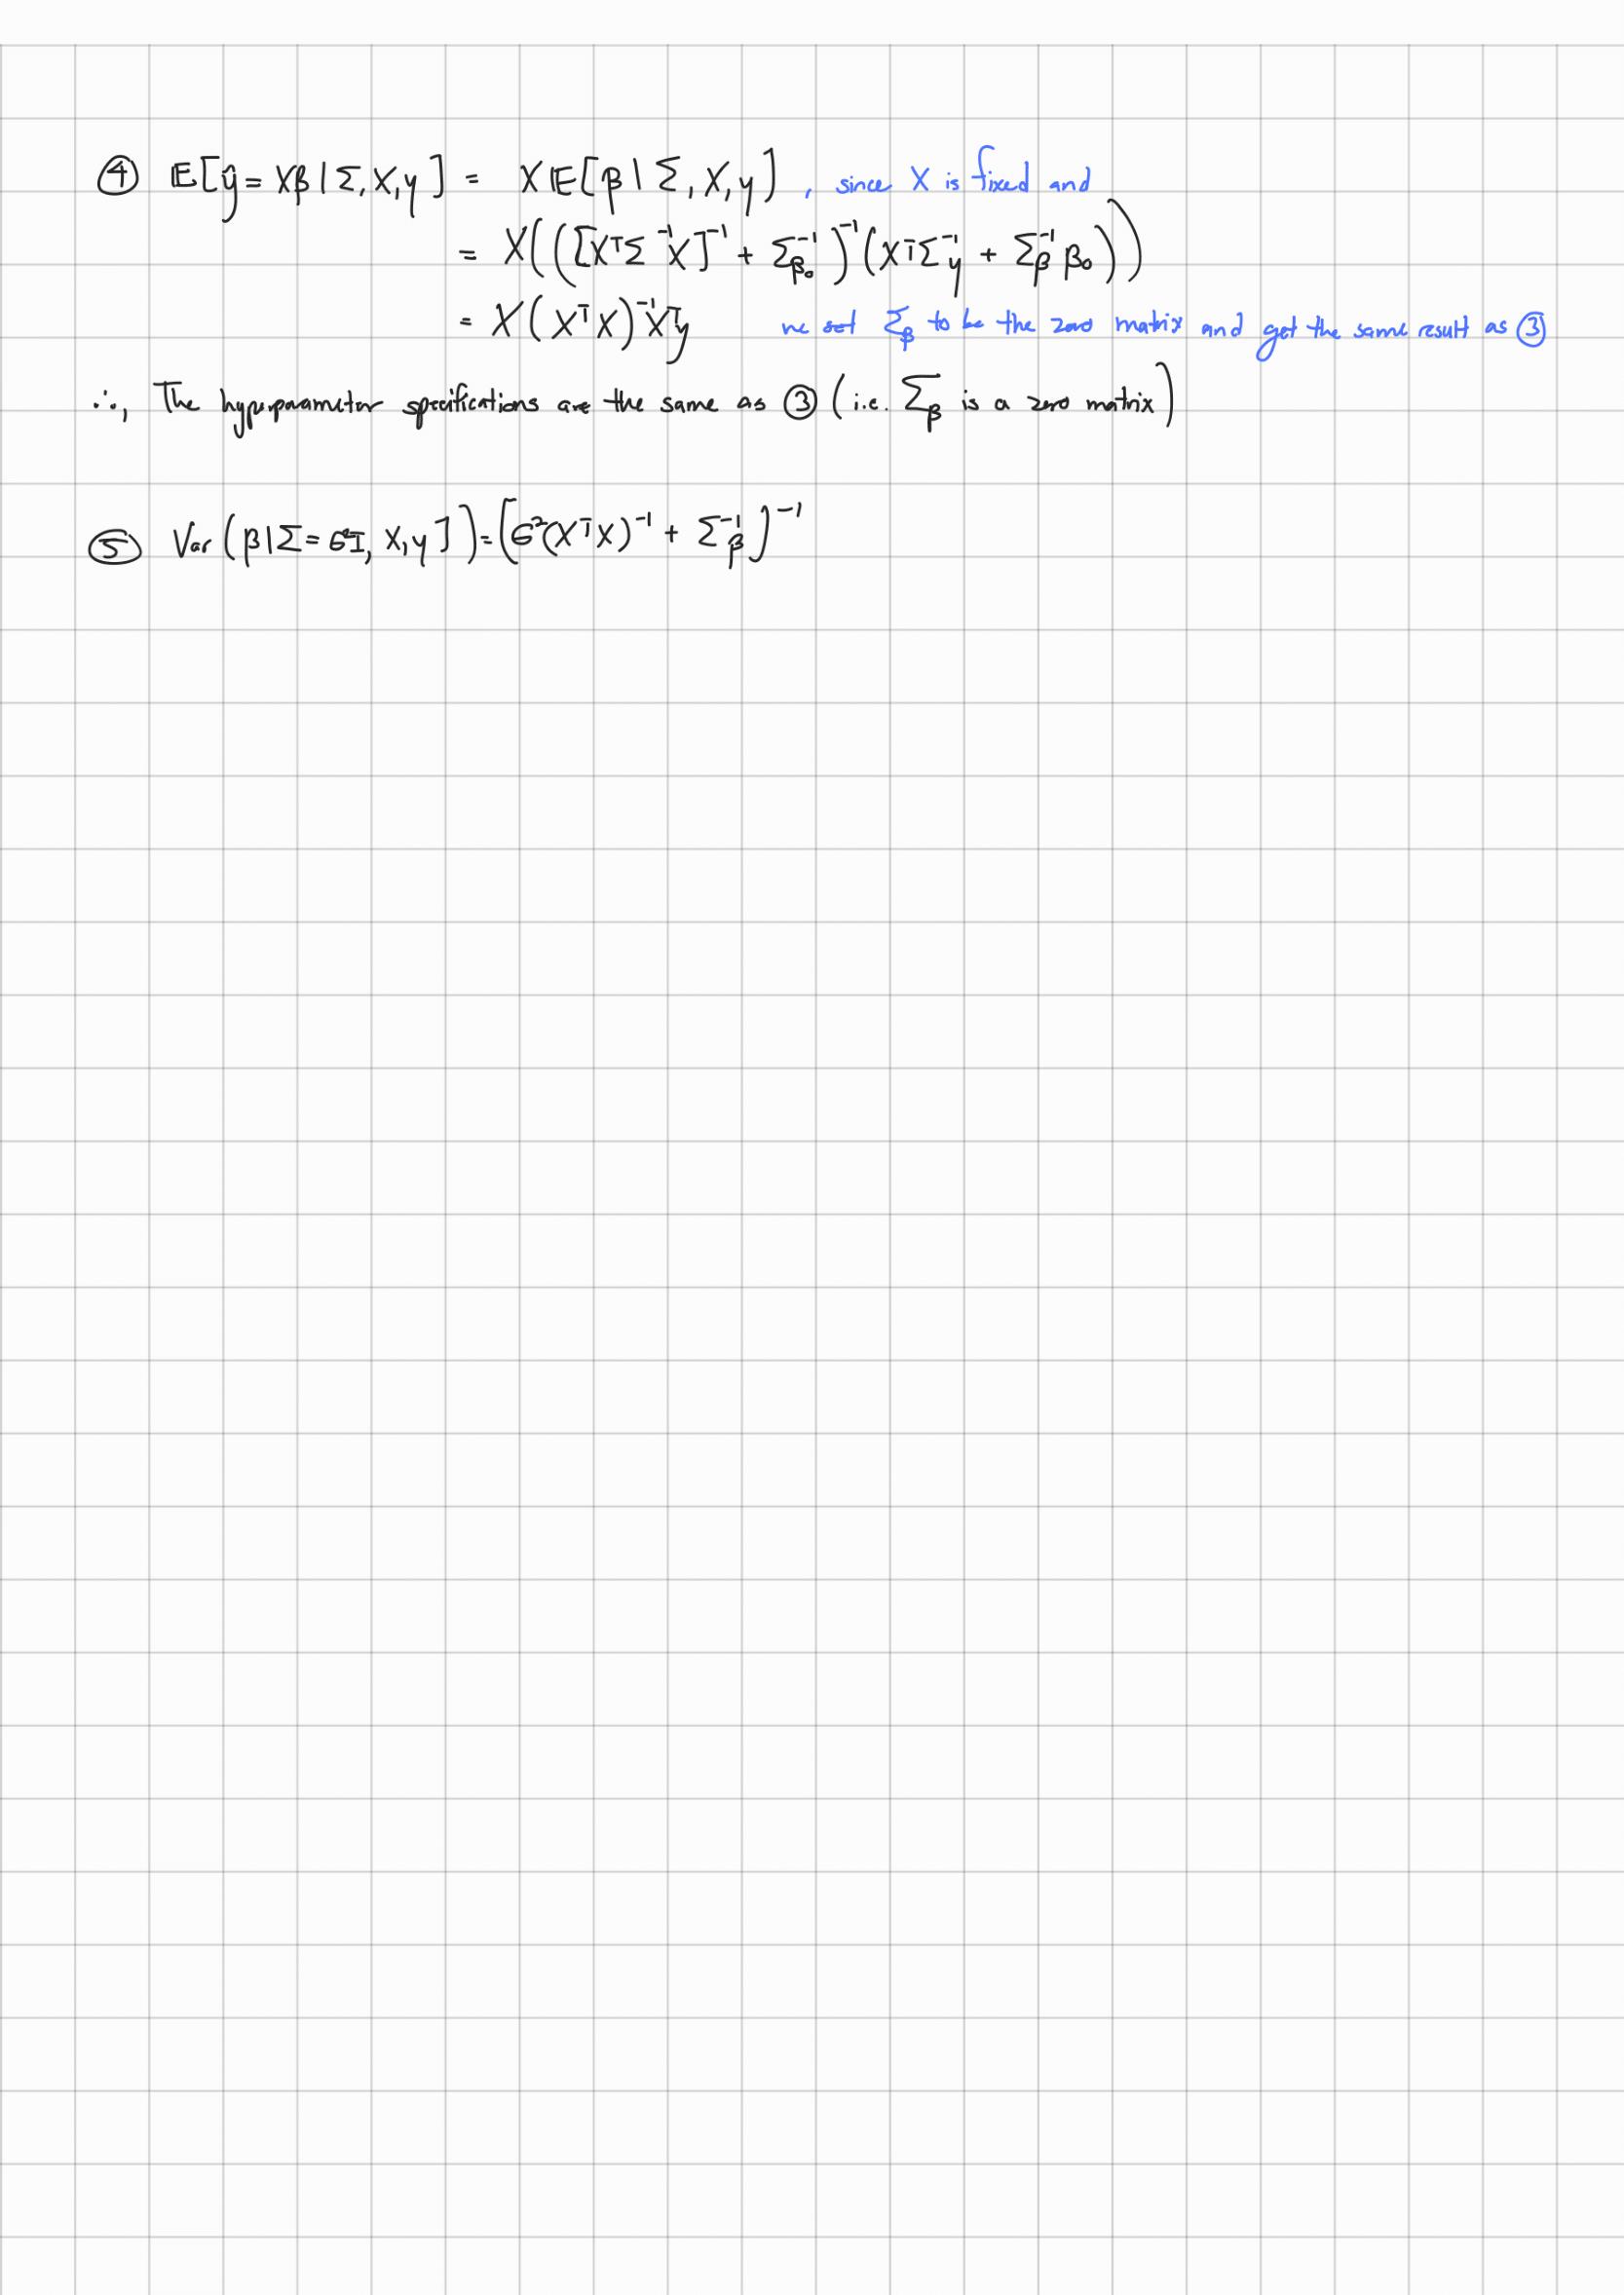

In [7]:
Image("p2.png", width=800, height=500)

### Part 3

In [21]:
X = df[[ 'Crude_oil_Vol.', 'Copper_Vol.', 'Platinum_Vol.', 'Gold_Vol.', 'Silver_Vol.']].values
y = df[['Natural_Gas_Vol.']].values
p = 5
n = len(y)

with pm.Model() as MVN_LKJ:
   
    # LKJ prior for the Cholesky decomposed covariance matrix
    packed_L = pm.LKJCholeskyCov('packed_L', n=p, eta=2, sd_dist=pm.Exponential.dist(1.0), compute_corr=False)
    L = pm.expand_packed_triangular(p, packed_L)

    # Reconstruct Covariance matrix with Cholesky factors
    Sigma = pm.Deterministic('Sigma', L.dot(L.T))

    betas = pm.MvNormal('betas', mu=np.zeros(p), chol = L, shape=(p,1))
    
    # Mean specification
    mu = pm.math.dot(X, betas) 
    
    # Likelihood of the observations
    y_obs = pm.MvNormal('y_obs', mu= mu, chol=L, observed=y)

with MVN_LKJ:
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [packed_L, betas]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1193 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 386 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
